In [552]:
import numpy as np
import pandas as pd
import missingno as msno

In [553]:
dataset = pd.read_csv('D:/python/深度学习/kaggle/titanic/train.csv')
X_test = pd.read_csv('D:/python/深度学习/kaggle/titanic/test.csv')

In [554]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [555]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:>

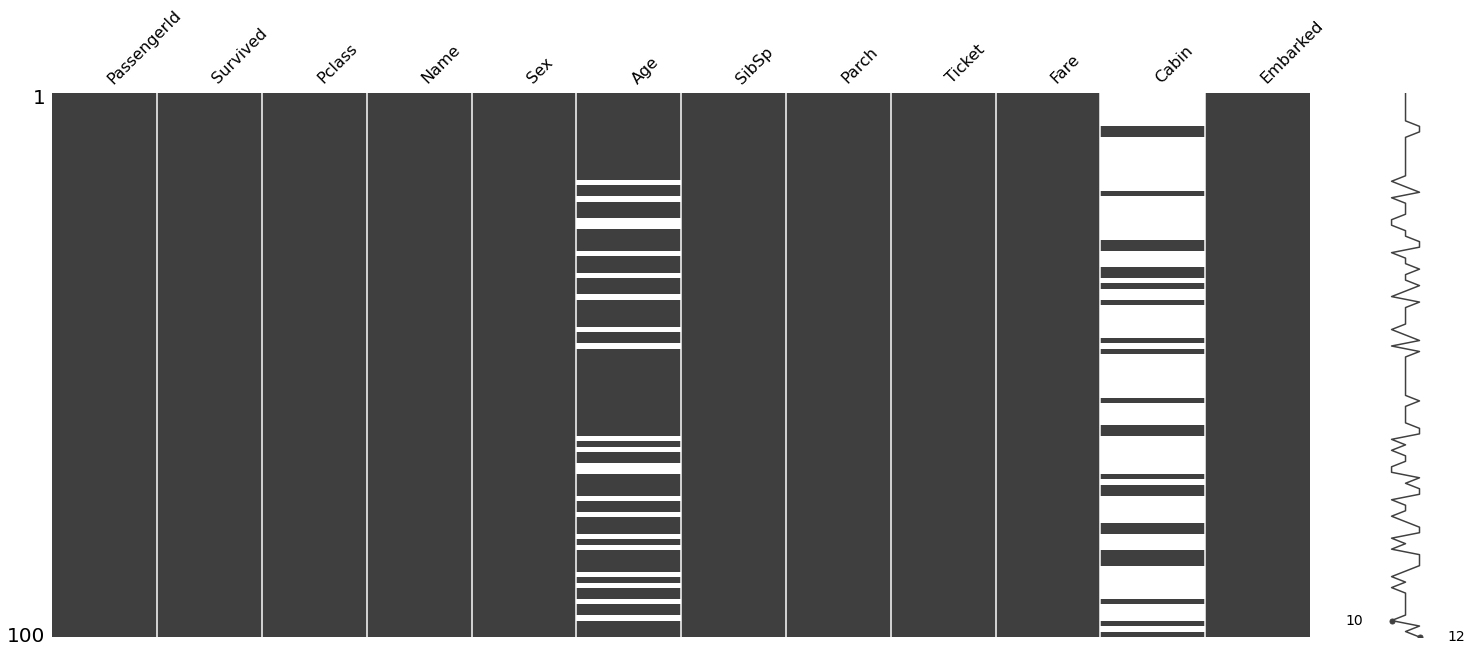

In [556]:
data_sample = dataset.sample(100)
msno.matrix(data_sample)

In [557]:
dataset_title = [i.split(',')[1].split('.')[0].strip() for i in dataset['Name']] 
dataset['Title'] = pd.Series(dataset_title)
dataset['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Don               1
the Countess      1
Lady              1
Ms                1
Mme               1
Sir               1
Capt              1
Jonkheer          1
Name: Title, dtype: int64

In [558]:
dataset['Title'] = dataset['Title'].replace(
    ['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Rare')
dataset['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

In [559]:
dataset_title = [i.split(',')[1].split('.')[0].strip() for i in X_test['Name']]
X_test['Title'] = pd.Series(dataset_title)
X_test['Title'].value_counts()  

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [560]:
X_test['Title'] = X_test['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Rare')
X_test['Title'].value_counts() 

Mr        240
Miss       78
Mrs        72
Master     21
Rare        7
Name: Title, dtype: int64

In [561]:
dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1
X_test['Family'] = X_test['SibSp'] + X_test['Parch'] + 1
def family(x):
    if x < 2:
        return 'Single'
    elif x == 2:
        return 'Couple'
    elif x <= 4:
        return 'InterM'
    else:
        return 'Large'
dataset['Family'] = dataset['Family'].apply(family)
X_test['Family'] = X_test['Family'].apply(family)
dataset['Family'].value_counts()

Single    537
Couple    161
InterM    131
Large      62
Name: Family, dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

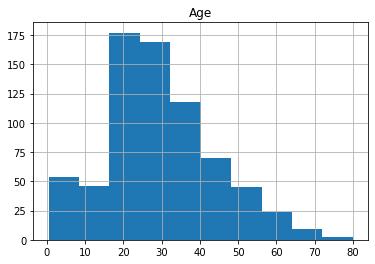

In [562]:
dataset.hist(column='Age')

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

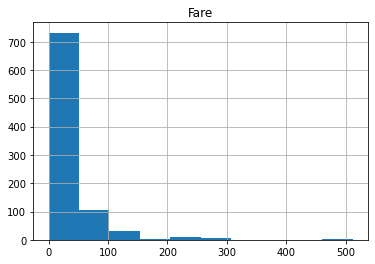

In [563]:
dataset.hist(column='Fare')

In [564]:
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
X_test['Embarked'].fillna(X_test['Embarked'].mode()[0], inplace=True)

dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)

dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].median(), inplace=True)

In [565]:
dataset = dataset.drop(['PassengerId', 'Cabin', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1)
X_test_passengers = X_test['PassengerId']
X_test = X_test.drop(['PassengerId', 'Cabin', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1)
dataset

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0,3,male,22.0,7.2500,S,Mr,Couple
1,1,1,female,38.0,71.2833,C,Mrs,Couple
2,1,3,female,26.0,7.9250,S,Miss,Single
3,1,1,female,35.0,53.1000,S,Mrs,Couple
4,0,3,male,35.0,8.0500,S,Mr,Single
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Rare,Single
887,1,1,female,19.0,30.0000,S,Miss,Single
888,0,3,female,28.0,23.4500,S,Miss,InterM
889,1,1,male,26.0,30.0000,C,Mr,Single


In [566]:
X_train = dataset.iloc[:, 1:8].values
Y_train = dataset.iloc[:, 0].values
X_test = X_test.values
X_train

array([[3, 'male', 22.0, ..., 'S', 'Mr', 'Couple'],
       [1, 'female', 38.0, ..., 'C', 'Mrs', 'Couple'],
       [3, 'female', 26.0, ..., 'S', 'Miss', 'Single'],
       ...,
       [3, 'female', 28.0, ..., 'S', 'Miss', 'InterM'],
       [1, 'male', 26.0, ..., 'C', 'Mr', 'Single'],
       [3, 'male', 32.0, ..., 'Q', 'Mr', 'Single']], dtype=object)

In [567]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [568]:
X_train[0], X_train[0].shape

(array([3, 'male', 22.0, 7.25, 'S', 'Mr', 'Couple'], dtype=object), (7,))

In [569]:
one_hot_encoder = ColumnTransformer(
    [(
    'one_hot_encoder',   #转换器名称
    OneHotEncoder(categories='auto'), #编码类型
    [0, 1, 4, 5, 6]
    )],
    remainder='passthrough'#其它列不做变换
)
X_train = one_hot_encoder.fit_transform(X_train).tolist()
X_test = one_hot_encoder.transform(X_test).tolist()
X_train, len(X_train)

([[0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   22.0,
   7.25],
  [1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   38.0,
   71.2833],
  [0.0,
   0.0,
   1.0,
   1.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   26.0,
   7.925],
  [1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   35.0,
   53.1],
  [0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   35.0,
   8.05],
  [0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   28.0,
   8.4583],
  [1.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,


In [570]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [571]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(19, 128)
        self.linear2 = torch.nn.Linear(128, 2)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = F.dropout(x, 0.1)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [572]:
model = Model()

In [573]:
criterion = torch.nn.CrossEntropyLoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [574]:
from sklearn.utils import shuffle

In [575]:
batch_size = 32
batch_no = len(X_train) // batch_size

In [576]:
for epoch in range(100):
    X_train, Y_train = shuffle(X_train, Y_train)
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_data = torch.tensor(X_train[start:end], dtype=torch.float32)
        y_data = torch.tensor(Y_train[start:end], dtype=torch.long)

        optimizer.zero_grad()
        outputs = model(x_data)
        loss = criterion(outputs, y_data)
        loss.backward()
        optimizer.step()

        if (i + 1) % 9 == 0:
             print(f'Epoch [{epoch + 1}/{100}], Step [{i + 1}/{batch_no}], Loss: {loss.item():.4f}')

Epoch [1/100], Step [9/27], Loss: 0.9196
Epoch [1/100], Step [18/27], Loss: 0.9804
Epoch [1/100], Step [27/27], Loss: 1.3989
Epoch [2/100], Step [9/27], Loss: 0.5237
Epoch [2/100], Step [18/27], Loss: 0.7275
Epoch [2/100], Step [27/27], Loss: 0.6624
Epoch [3/100], Step [9/27], Loss: 0.3547
Epoch [3/100], Step [18/27], Loss: 0.8209
Epoch [3/100], Step [27/27], Loss: 0.4884
Epoch [4/100], Step [9/27], Loss: 0.4566
Epoch [4/100], Step [18/27], Loss: 0.6942
Epoch [4/100], Step [27/27], Loss: 0.4115
Epoch [5/100], Step [9/27], Loss: 0.5193
Epoch [5/100], Step [18/27], Loss: 0.3431
Epoch [5/100], Step [27/27], Loss: 0.5676
Epoch [6/100], Step [9/27], Loss: 0.5954
Epoch [6/100], Step [18/27], Loss: 0.3460
Epoch [6/100], Step [27/27], Loss: 0.6074
Epoch [7/100], Step [9/27], Loss: 0.3569
Epoch [7/100], Step [18/27], Loss: 0.3084
Epoch [7/100], Step [27/27], Loss: 0.3177
Epoch [8/100], Step [9/27], Loss: 0.6115
Epoch [8/100], Step [18/27], Loss: 0.6174
Epoch [8/100], Step [27/27], Loss: 0.4877


In [583]:
X_test = torch.tensor(X_test)
with torch.no_grad():
    test_result = model(X_test)
    _, labels = torch.max(test_result, 1)
    survived = labels.data.numpy()
survived


d:\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [596]:
import numpy as np  
import pandas as pd  
  
df = pd.DataFrame(survived, columns=['Survived'])
df.to_csv('D:/python/深度学习/kaggle/titanic/output.csv', index=False) 

PermissionError: [Errno 13] Permission denied: 'D:/python/深度学习/kaggle/titanic/output.csv'